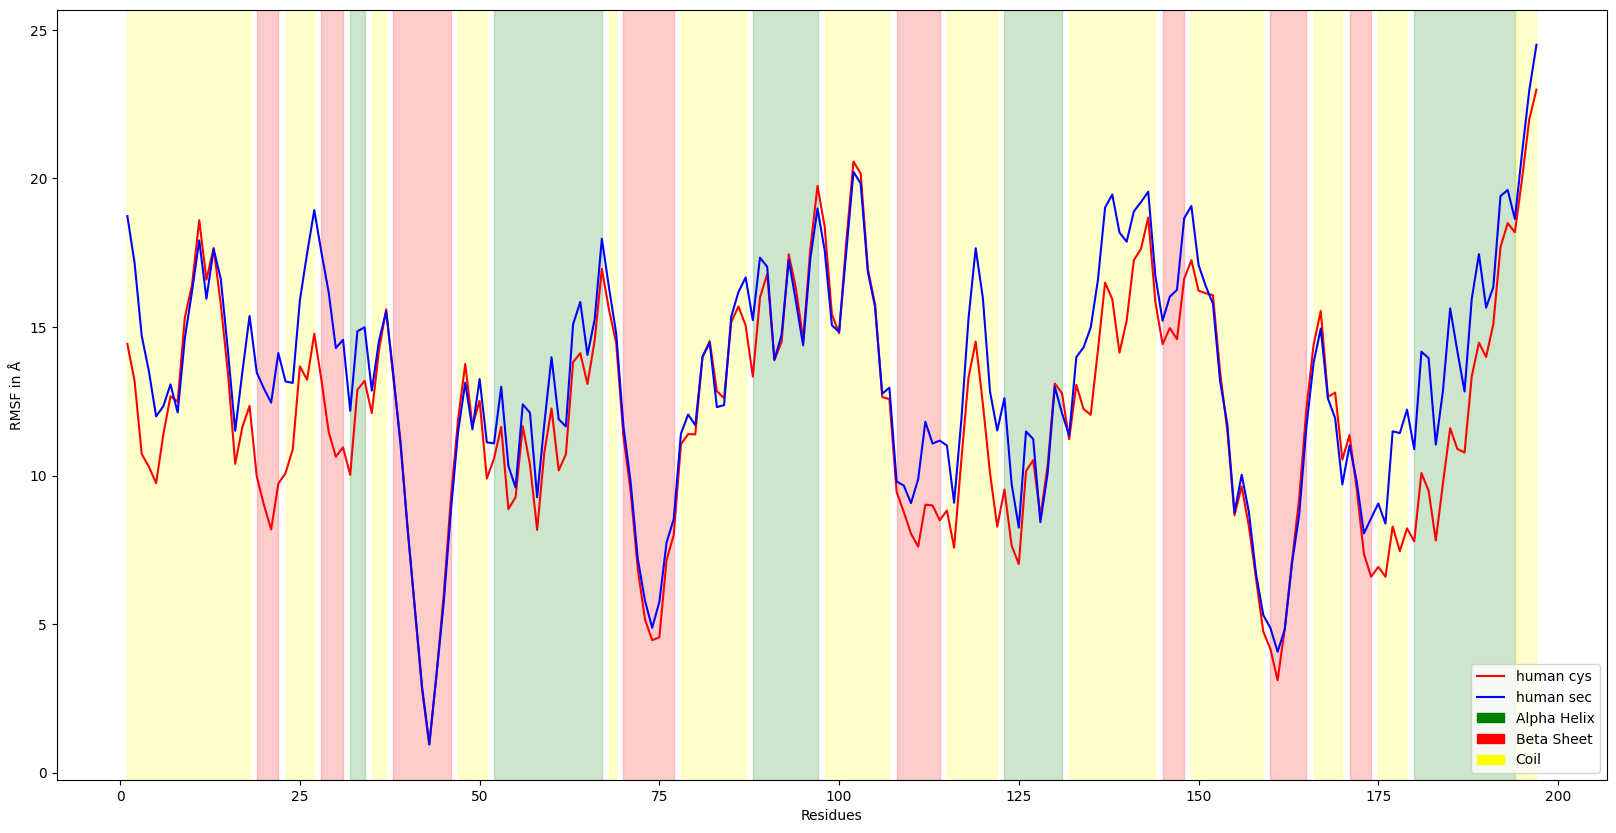

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.patches as patches

# Specify the pattern for .dat files for mousecys
file_pattern_cys = '/home/hp/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsfhumancysgssg.dat'

# Get a list of all .dat files that match the pattern for mousecys
file_list_cys = glob.glob(file_pattern_cys)

# Specify the pattern for .dat files for mousesec
file_pattern_sec = '/home/hp/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsfhumansecgssg.dat'

# Get a list of all .dat files that match the pattern for mousesec
file_list_sec = glob.glob(file_pattern_sec)

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Define colors for the plots
cys_color = 'red'
sec_color = 'blue'

# Plot each file for human cys if available
mousecys_handles = []
if file_list_cys:
    for index, file_path in enumerate(file_list_cys, start=1):
        data = np.loadtxt(file_path)
        x_values = data[:, 0]
        y_values_list = data[:, 1:]
        
        for y_values in y_values_list.T:
            line, = ax.plot(x_values, y_values, label=f'human cys {index}', color=cys_color, linestyle='-')
            mousecys_handles.append(line)
else:
    print("No human cys files found or loaded.")

# Plot each file for human sec if available
mousesec_handles = []
if file_list_sec:
    for index, file_path in enumerate(file_list_sec, start=1):
        data = np.loadtxt(file_path)
        x_values = data[:, 0]
        y_values_list = data[:, 1:]
        
        for y_values in y_values_list.T:
            line, = ax.plot(x_values, y_values, label=f'human sec {index}', color=sec_color, linestyle='-')
            mousesec_handles.append(line)
else:
    print("No human sec files found or loaded.")

# Add labels
ax.set_xlabel('Residues')
ax.set_ylabel('RMSF in Å')

# Specify the secondary structure regions
plt.axvspan(1, 18, zorder=0, alpha=0.2, color='yellow', label='COIL')
plt.axvspan(19,22, zorder=0, alpha=0.2, color='red', label='BETA SHEET')
plt.axvspan(23, 27, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(28, 31, zorder=0, alpha=0.2, color='red')
plt.axvspan(32, 34, zorder=0, alpha=0.2, color='green', label='ALPHA HELIX')
plt.axvspan(35, 37, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(38, 46, zorder=0, alpha=0.2, color='red')
plt.axvspan(47, 51, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(52, 67, zorder=0, alpha=0.2, color='green')
plt.axvspan(68, 69, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(70, 77, zorder=0, alpha=0.2, color='red')
plt.axvspan(78, 87, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(88, 97, zorder=0, alpha=0.2, color='green')
plt.axvspan(98, 107, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(108, 114, zorder=0, alpha=0.2, color='red')
plt.axvspan(115, 122, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(123, 131, zorder=0, alpha=0.2, color='green')
plt.axvspan(132, 144, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(145, 148, zorder=0, alpha=0.2, color='red')
plt.axvspan(149, 159, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(160, 165, zorder=0, alpha=0.2, color='red')
plt.axvspan(166, 170, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(171, 174, zorder=0, alpha=0.2, color='red')
plt.axvspan(175, 179, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(180, 194, zorder=0, alpha=0.2, color='green')
plt.axvspan(194, 197, zorder=0, alpha=0.2, color='yellow')

# Add legend patches
alpha_patch = patches.Patch(color='green', label='Alpha Helix')
beta_patch = patches.Patch(color='red', label='Beta Sheet')
coil_patch = patches.Patch(color='yellow', label='Coil')

# Prepare the legend handles and labels based on the available data
handles = []
labels = []

# Add human cys plot handle if available
if mousecys_handles:
    handles.append(mousecys_handles[0])
    labels.append('human cys')

# Add human sec plot handle if available
if mousesec_handles:
    handles.append(mousesec_handles[0])
    labels.append('human sec')

# Add secondary structure patches
handles.extend([alpha_patch, beta_patch, coil_patch])
labels.extend(['Alpha Helix', 'Beta Sheet', 'Coil'])

# Create the legend only if there are valid handles
if handles:
    ax.legend(handles=handles, labels=labels, loc='lower right')

# Display the plot
plt.show()


Files for mouse cys: ['/home/hp/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsfmousecysgssg.dat']
Files for mouse sec: ['/home/hp/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsfmousesecgssg.dat']


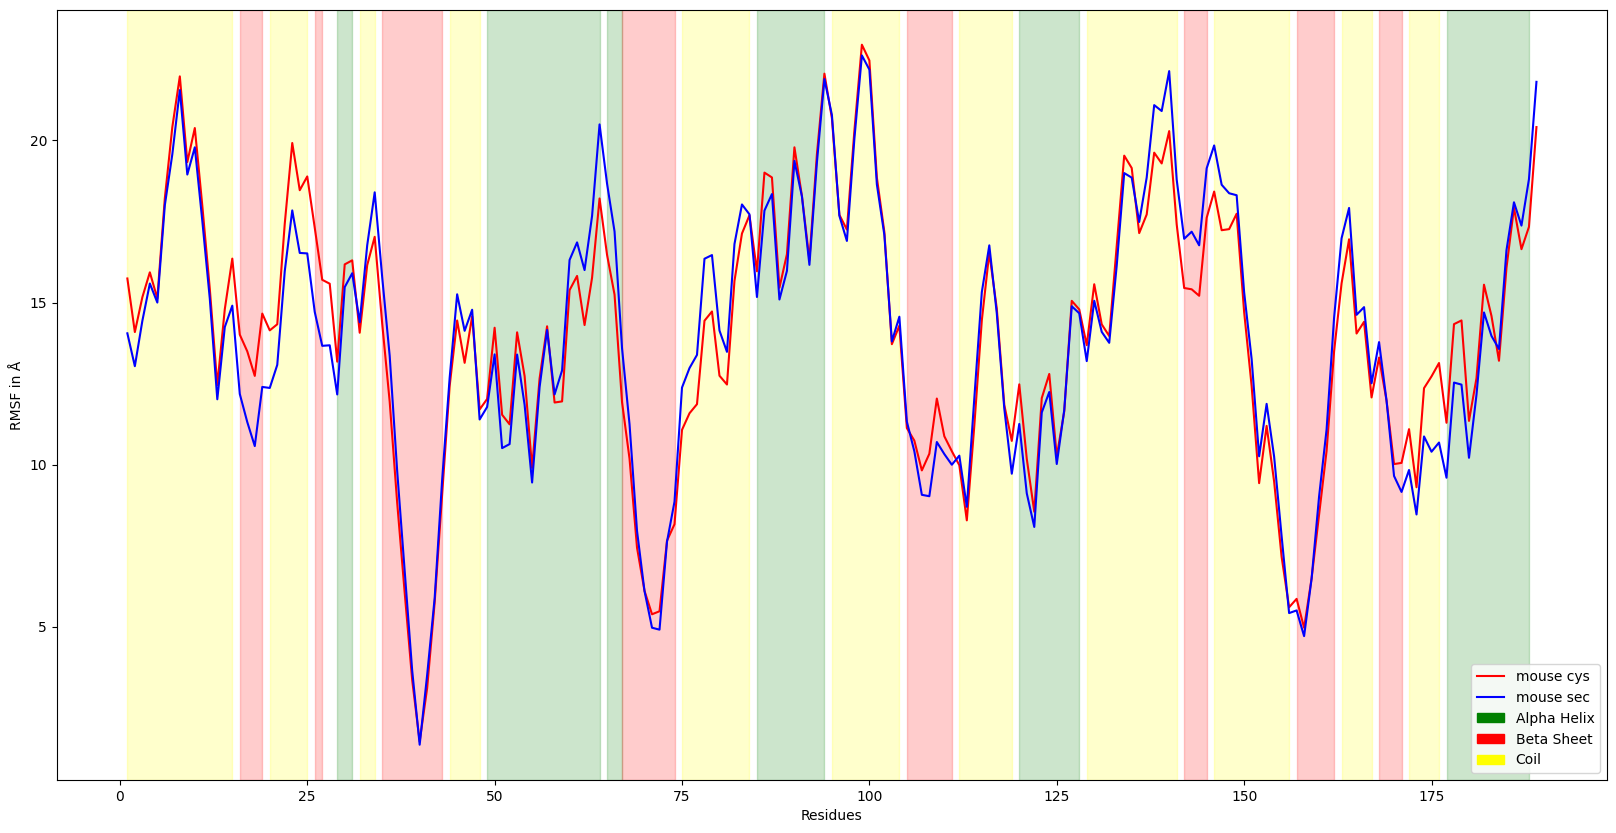

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.patches as patches

# Function to load data and handle potential issues
def load_data(file_path):
    try:
        data = np.loadtxt(file_path)
        if data.ndim == 1:
            print(f"Warning: {file_path} is a 1-dimensional array. Skipping.")
            return None
        elif data.ndim == 2 and data.shape[1] > 1:
            return data
        else:
            print(f"Warning: {file_path} is not in the expected format. Skipping.")
            return None
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Specify the pattern for .dat files for mouse cys
file_pattern_cys = '/home/hp/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsfmousecysgssg.dat'
file_list_cys = glob.glob(file_pattern_cys)

# Specify the pattern for .dat files for mouse sec
file_pattern_sec = '/home/hp/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsfmousesecgssg.dat'
file_list_sec = glob.glob(file_pattern_sec)

# Debug: Print file lists to verify
print("Files for mouse cys:", file_list_cys)
print("Files for mouse sec:", file_list_sec)

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Define colors for the plots
cys_color = 'red'
sec_color = 'blue'

# Plot each file for mouse cys if available
mousecys_handles = []
if file_list_cys:
    for index, file_path in enumerate(file_list_cys, start=1):
        data = load_data(file_path)
        if data is not None:
            x_values = data[:, 0]
            y_values_list = data[:, 1:]
            for y_values in y_values_list.T:
                line, = ax.plot(x_values, y_values, label=f'mouse cys {index}', color=cys_color, linestyle='-')
                mousecys_handles.append(line)
else:
    print("No mouse cys files found or loaded.")

# Plot each file for mouse sec if available
mousesec_handles = []
if file_list_sec:
    for index, file_path in enumerate(file_list_sec, start=1):
        data = load_data(file_path)
        if data is not None:
            x_values = data[:, 0]
            y_values_list = data[:, 1:]
            for y_values in y_values_list.T:
                line, = ax.plot(x_values, y_values, label=f'mouse sec {index}', color=sec_color, linestyle='-')
                mousesec_handles.append(line)
else:
    print("No mouse sec files found or loaded.")

# Add labels
ax.set_xlabel('Residues')
ax.set_ylabel('RMSF in Å')

# Specify the updated secondary structure regions
plt.axvspan(1, 15, zorder=0, alpha=0.2, color='yellow', label='COIL')
plt.axvspan(16, 19, zorder=0, alpha=0.2, color='red', label='BETA SHEET')
plt.axvspan(20, 25, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(26, 27, zorder=0, alpha=0.2, color='red')
plt.axvspan(29, 31, zorder=0, alpha=0.2, color='green', label='ALPHA HELIX')
plt.axvspan(32, 34, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(35, 43, zorder=0, alpha=0.2, color='red')
plt.axvspan(44, 48, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(49, 64, zorder=0, alpha=0.2, color='green')
plt.axvspan(65, 67, zorder=0, alpha=0.2, color='green')
plt.axvspan(67, 74, zorder=0, alpha=0.2, color='red')
plt.axvspan(75, 84, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(85, 94, zorder=0, alpha=0.2, color='green')
plt.axvspan(95, 104, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(105, 111, zorder=0, alpha=0.2, color='red')
plt.axvspan(112, 119, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(120, 128, zorder=0, alpha=0.2, color='green')
plt.axvspan(129, 141, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(142, 145, zorder=0, alpha=0.2, color='red')
plt.axvspan(146, 156, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(157, 162, zorder=0, alpha=0.2, color='red')
plt.axvspan(163, 167, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(168, 171, zorder=0, alpha=0.2, color='red')
plt.axvspan(172, 176, zorder=0, alpha=0.2, color='yellow')
plt.axvspan(177, 188, zorder=0, alpha=0.2, color='green')

# Add legend patches
alpha_patch = patches.Patch(color='green', label='Alpha Helix')
beta_patch = patches.Patch(color='red', label='Beta Sheet')
coil_patch = patches.Patch(color='yellow', label='Coil')

# Prepare the legend handles and labels based on the available data
handles = []
labels = []

# Add mouse cys plot handle if available
if mousecys_handles:
    handles.append(mousecys_handles[0])
    labels.append('mouse cys')

# Add mouse sec plot handle if available
if mousesec_handles:
    handles.append(mousesec_handles[0])
    labels.append('mouse sec')

# Add secondary structure patches
handles.extend([alpha_patch, beta_patch, coil_patch])
labels.extend(['Alpha Helix', 'Beta Sheet', 'Coil'])

# Create the legend only if there are valid handles
if handles:
    ax.legend(handles=handles, labels=labels, loc='lower right')
else:
    print("No valid data to plot. Skipping legend creation.")

# Display the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


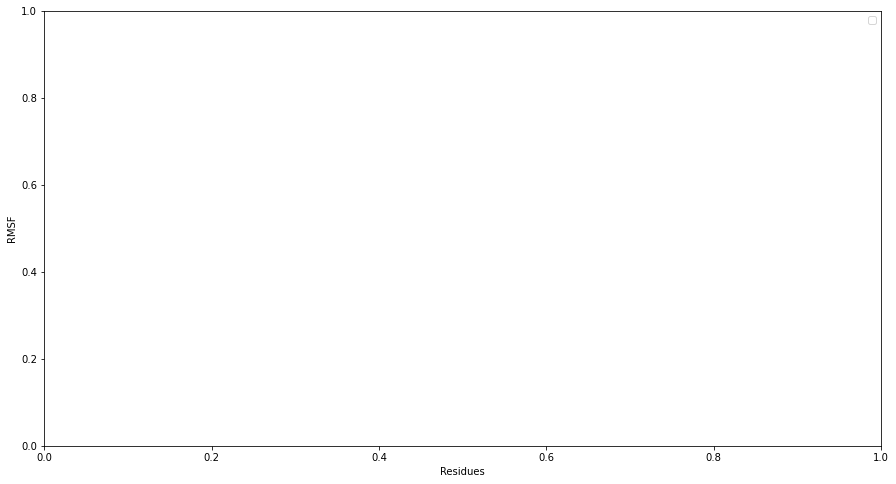

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.patches as patches


# Specify the pattern for .dat files
file_pattern = 'rmsf*.dat'

# Get a list of all .dat files that match the pattern
file_list = glob.glob(file_pattern)

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Define a list of RGB tuples for colors
colors = ['blue', 'purple', 'green', 'red',]

# Plot each file with a different color
for index, (file_path, color) in enumerate(zip(file_list, colors), start=1):
    # Load data from the file using numpy
    data = np.loadtxt(file_path)

    # Assuming the first column is x-axis data
    x_values = data[:, 0]

    # Assuming the remaining columns are y-axis data for different lines
    y_values_list = data[:, 1:]

    # Plot each line with a different color
    for y_values in y_values_list.T:
        ax.plot(x_values, y_values, label=f'Line {index} - {file_path}', color=color)

# Add labels
ax.set_xlabel('Residues')
ax.set_ylabel('RMSF')

plt.legend()
plt.show()

/home/nayanika/miniconda3/envs/AmberTools22/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


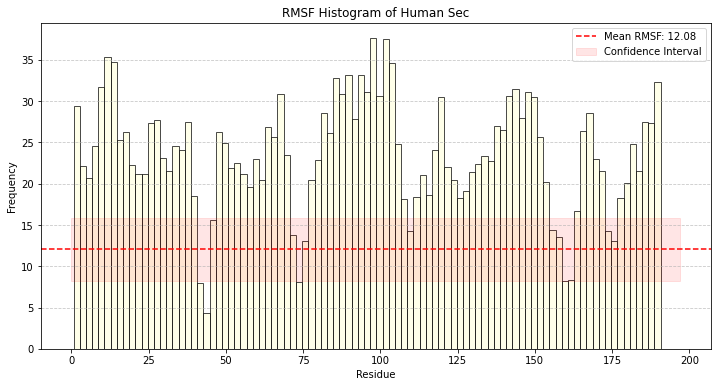

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Provide the correct file path
file_path = '/home/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsfhumansecgssg.dat'

# Read RMSF data from the file
data = np.loadtxt(file_path)

# Extract residue numbers and RMSF values
residues = data[:, 0]
rmsf_values = data[:, 1]

# Calculate mean and standard deviation
mean_rmsf = np.mean(rmsf_values)
std_rmsf = np.std(rmsf_values)

# Create an array with all residues from 1 to 197
all_residues = np.arange(1, 190)

# Set bins manually to align with residue numbers
bins = np.arange(0.7, 191.5, 2)  # Increased width and added gaps

# Increase the size of the figure
plt.figure(figsize=(12, 6))

# Create a histogram with the available RMSF values, setting a custom color
plt.hist(residues, bins=bins, weights=rmsf_values, edgecolor='black', alpha=0.7, color='lightyellow')

# Add mean value and confidence interval
plt.axhline(y=mean_rmsf, color='red', linestyle='--', label=f'Mean RMSF: {mean_rmsf:.2f}')
plt.fill_between([0, 197], mean_rmsf - std_rmsf, mean_rmsf + std_rmsf, color='red', alpha=0.1, label='Confidence Interval')

plt.title('RMSF Histogram of Human Sec')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

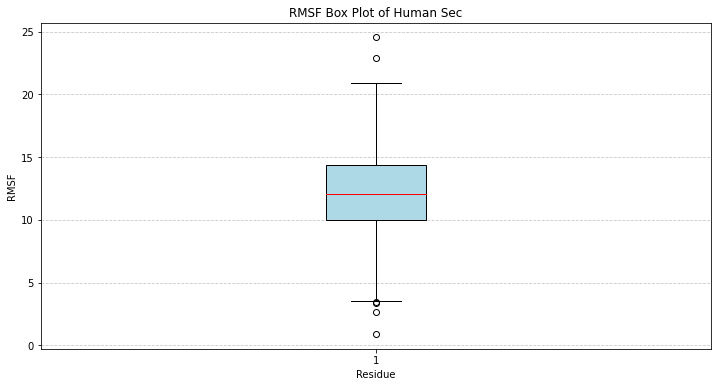

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Provide the correct file path
file_path = '/home/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsfhumansecgssg.dat'

# Read RMSF data from the file
data = np.loadtxt(file_path)

# Extract residue numbers and RMSF values
residues = data[:, 0]
rmsf_values = data[:, 1]

# Increase the size of the figure
plt.figure(figsize=(12, 6))

# Create a box plot
plt.boxplot(rmsf_values, patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.title('RMSF Box Plot of Human Sec')
plt.xlabel('Residue')
plt.ylabel('RMSF')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Provide the correct directory path
directory_path = '/home/nayanika/github/Thesis/Simulation/cpptraj_scripts/Files/GSSG'

# Get all files in the directory ending with ".dat"
file_paths = [f for f in os.listdir(directory_path) if f.endswith('rmsfhumansecgssg.dat')]

# Increase the size of the figure
plt.figure(figsize=(12, 6))

# Loop through each file, read the data, and plot the heatmap
for i, file_path in enumerate(file_paths):
    file_full_path = os.path.join(directory_path, file_path)
    df = pd.read_csv(file_full_path, sep='\s+', header=None, names=['Residue', 'RMSF'])
    
    # Ensure the RMSF values are treated as numeric
    df['RMSF'] = pd.to_numeric(df['RMSF'], errors='coerce')
    
    # Create a 2D array for the heatmap
    heatmap_data = df['RMSF'].to_numpy().reshape(1, -1)
    
    # Plot the heatmap for each file
    plt.imshow(heatmap_data, cmap='viridis', aspect='auto', extent=[1, len(df) + 1, i, i+1], alpha=0.7, vmin=0, vmax=30)

# Add colorbar for the last image
cbar = plt.colorbar(label='RMSF', pad=0.01)

plt.title('RMSF Heatmap')
plt.xlabel('Residue')
plt.ylabel('HumanCys')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/nayanika/github/Thesis/Simulation/cpptraj_scripts/Files/GSSG'

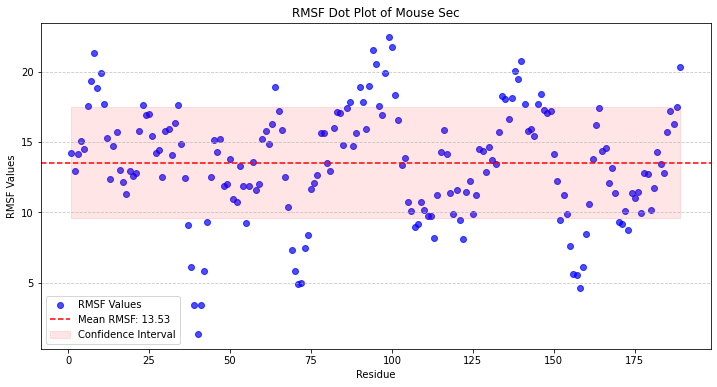

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Provide the correct file path
file_path = '/home/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsfmousesecgssg.dat'

# Read RMSF data from the file
data = np.loadtxt(file_path)

# Extract residue numbers and RMSF values
residues = data[:, 0]
rmsf_values = data[:, 1]

# Increase the size of the figure
plt.figure(figsize=(12, 6))

# Create a dot plot with the available RMSF values
plt.scatter(residues, rmsf_values, color='blue', alpha=0.7, label='RMSF Values')

# Calculate mean and standard deviation
mean_rmsf = np.mean(rmsf_values)
std_rmsf = np.std(rmsf_values)

# Add mean value and confidence interval
plt.axhline(y=mean_rmsf, color='red', linestyle='--', label=f'Mean RMSF: {mean_rmsf:.2f}')
plt.fill_between(residues, mean_rmsf - std_rmsf, mean_rmsf + std_rmsf, color='red', alpha=0.1, label='Confidence Interval')

plt.title('RMSF Dot Plot of Mouse Sec')
plt.xlabel('Residue')
plt.ylabel('RMSF Values')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()